<a href="https://colab.research.google.com/github/jweir136/Digits1/blob/master/Digits1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, learning_curve, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
digits = load_digits()
X = digits.data
y = digits.target

In [38]:
X.shape

(1797, 64)

In [39]:
y.shape

(1797,)

In [0]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=.2, random_state=42)

In [0]:
knn = Pipeline([
    ("pca", PCA(n_components=0.99)),
    ("knn", KNeighborsClassifier())
])

In [0]:
kfold = KFold(n_splits=10, shuffle=True)
score = cross_val_score(knn, trainX, trainY, cv=kfold, scoring='accuracy')

In [54]:
score.mean()

0.9853972416472416

In [0]:
params = {
    "knn__n_neighbors":[1,2,3,4,5,5]
}

grid = GridSearchCV(knn, params, cv=10, verbose=3, n_jobs=-1)

In [45]:
grid.fit(trainX, trainY)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.0s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [46]:
grid.best_params_

{'knn__n_neighbors': 3}

In [48]:
params = {
    "pca__n_components":[0.99, 0.98, 0.96, 0.94]
}
grid = GridSearchCV(knn, params, cv=10, verbose=3, n_jobs=-1)
grid.fit(trainX, trainY)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.9s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'pca__n_components': [0.99, 0.98, 0.96, 0.94]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [49]:
grid.best_params_

{'pca__n_components': 0.99}

In [55]:
train_sizes = [5,100,500,955]

train_size, train_score, test_score = learning_curve(
  estimator=knn,
  X=trainX,
  y=trainY,
  scoring='accuracy',
  train_sizes=train_sizes
)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


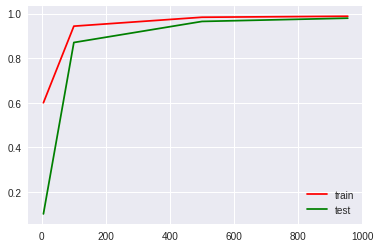

In [56]:
mean_train = train_score.mean(axis=1)
mean_test = test_score.mean(axis=1)

plt.plot(train_size, mean_train, 'r-', label='train')
plt.plot(train_size, mean_test, 'g-', label='test')
plt.legend()
plt.show()

Judging from the learning curve, the model is slightly overfitting, but it still has a very low bias (high accuracy).

In [57]:
knn.fit(trainX, trainY)
confusion_matrix(testY, knn.predict(testX))

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  0, 38]])